In [78]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns

In [79]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [80]:
import statsmodels.api as sm    
from statsmodels.stats.outliers_influence import variance_inflation_factor #多重共线性验证

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
#倒入加利福尼亚数据集
from sklearn.datasets import fetch_california_housing as fch
fch = fch(as_frame = False)

In [82]:
cfx = pd.DataFrame(fch.data)
print(type(cfx))
cfy = pd.Series(fch.target)
cfdata = pd.concat([cfx,cfy],axis=1)
cfdata.columns = ['medinc','houseage','averooms','avebedrms','population',
                  'aveoccup','latitude','longitude','price']
cfdata.head()


<class 'pandas.core.frame.DataFrame'>


,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [83]:
#验视数据
cfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   medinc      20640 non-null  float64
 1   houseage    20640 non-null  float64
 2   averooms    20640 non-null  float64
 3   avebedrms   20640 non-null  float64
 4   population  20640 non-null  float64
 5   aveoccup    20640 non-null  float64
 6   latitude    20640 non-null  float64
 7   longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [84]:
cfdata.describe([0,0.01,0.25,0.75,0.99])

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
0%,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
1%,1.069631,4.000000,2.581133,0.872840,88.000000,1.536686,32.680000,-123.220000,0.500000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
99%,10.596540,52.000000,10.357033,2.127541,5805.830000,5.394812,40.626100,-116.290000,5.000010


<AxesSubplot:xlabel='averooms'>

<AxesSubplot:xlabel='avebedrms'>

<AxesSubplot:xlabel='population'>

<AxesSubplot:xlabel='aveoccup'>

<AxesSubplot:xlabel='medinc'>

<AxesSubplot:xlabel='houseage'>

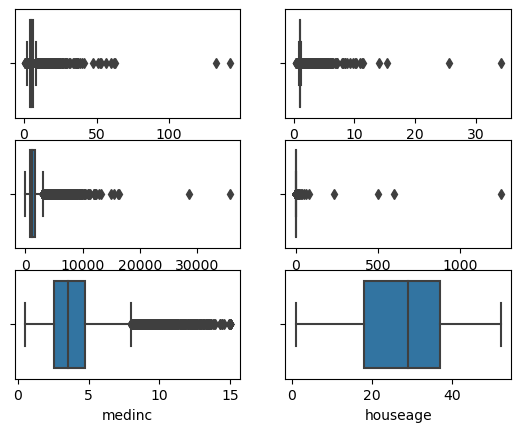

In [85]:
fig, axes = plt.subplots(3,2)
sns.boxplot(x = 'averooms',data = cfdata, ax = axes[0,0])
sns.boxplot(x = 'avebedrms',data = cfdata, ax = axes[0,1])
sns.boxplot(x = 'population',data = cfdata, ax = axes[1,0])
sns.boxplot(x = 'aveoccup',data = cfdata, ax = axes[1,1])
sns.boxplot(x = 'medinc',data = cfdata, ax = axes[2,0])
sns.boxplot(x = 'houseage',data = cfdata, ax = axes[2,1])


In [86]:
cfdata.corr()[abs(cfdata.corr())>0.5] # type: ignore

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
medinc,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688075
houseage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
averooms,NaN,NaN,1.000000,0.847621,NaN,NaN,NaN,NaN,NaN
avebedrms,NaN,NaN,0.847621,1.000000,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
aveoccup,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.924664,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,-0.924664,1.000000,NaN
price,0.688075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [87]:
#solution1 删除异常值，个别极大值的样本，共删除20540样本中的8个样本

cfdata_1 = cfdata[cfdata.averooms<75]
cfdata_1.shape
cfdata_1 = cfdata_1[cfdata_1.avebedrms<20]
cfdata_1.shape
cfdata_1=cfdata_1[cfdata_1.population<25000]
cfdata_1.shape
cfdata_1=cfdata_1[cfdata_1.aveoccup<100]
cfdata_1.shape #删除异常值的数据集    

(20638, 9)

(20638, 9)

(20636, 9)

(20632, 9)

In [88]:
cfdata_1.corr()[abs(cfdata.corr())>0.5] 


,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
medinc,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688734
houseage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
averooms,NaN,NaN,1.000000,0.789849,NaN,NaN,NaN,NaN,NaN
avebedrms,NaN,NaN,0.789849,1.000000,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
aveoccup,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.924812,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,-0.924812,1.000000,NaN
price,0.688734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [89]:
#sloution2: 删除位于百分之之99分位以上的样本，共删除515个样本
cfdata_2 = cfdata[cfdata.averooms<10.5]
cfdata_2.shape
cfdata_2 = cfdata_2[cfdata_2.avebedrms<2.5]
cfdata_2.shape
cfdata_2 = cfdata_2[cfdata_2.population<5900]
cfdata_2.shape
cfdata_2 = cfdata_2[cfdata_2.aveoccup<6]
cfdata.shape

(20441, 9)

(20428, 9)

(20230, 9)

(20640, 9)

<AxesSubplot:xlabel='averooms', ylabel='price'>

<AxesSubplot:xlabel='averooms', ylabel='price'>

<AxesSubplot:xlabel='averooms', ylabel='price'>

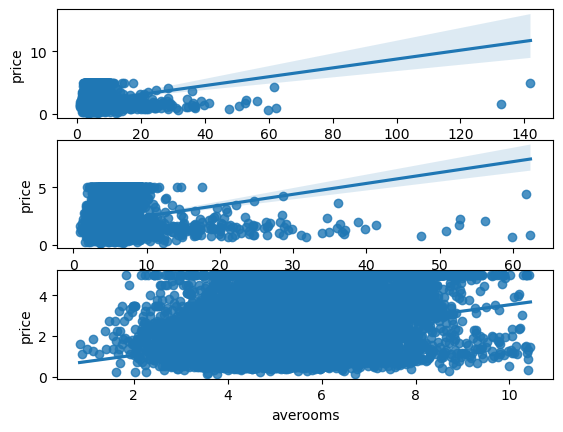

In [90]:
fig, axes = plt.subplots(3,1)
sns.regplot(x='averooms', y='price', data=cfdata, ax = axes[0])
sns.regplot(x='averooms', y='price', data=cfdata_1, ax = axes[1])
sns.regplot(x='averooms', y='price', data=cfdata_2, ax = axes[2])
# 选择数据3作为模型训练数据

In [91]:
# 数据预处理 添加截距项
cfdata_2 = sm.add_constant(cfdata_2)
cfdata_2.head()

,const,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [92]:
cfdata = sm.add_constant(cfdata)
cfdata.head()

,const,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [93]:
# 多重共线性验证
vif_2 = [variance_inflation_factor(cfdata_2.iloc[:,1:9].values, i) 
         for i in range(cfdata_2.shape[1]-2)]
vif_2

[14.076150270504646,
 7.655962183174025,
 53.94588893377952,
 107.65396361459698,
 4.146765414013414,
 19.330210601483603,
 614.2400161932479,
 896.4693798951868]

In [94]:
# 建模
##原数据集
X = cfdata.iloc[:,:-1]
Y = cfdata['price']
##删除异常值后的数据集
X_2 = cfdata_2.iloc[:,:-1]
Y_2 = cfdata_2["price"]

In [118]:
X.head()

,const,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [95]:
# 建模(sm)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:00:29   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
medinc         0.4367      0.004    104.054      0.000       0.428       0.445
houseage       0.0094      0.000     21.143      0.000       0.009       0.010
averooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
avebedrms      0.6451      0.028     22.928      0.000       0.590       0.700
population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
aveoccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
model_2 = sm.OLS(Y_2,X_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     5089.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:00:29   Log-Likelihood:                -20352.
No. Observations:               20125   AIC:                         4.072e+04
Df Residuals:                   20116   BIC:                         4.079e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.7078      0.638    -54.429      0.000     -35.958     -33.458
medinc         0.4347      0.004    100.525      0.000       0.426       0.443
houseage       0.0115      0.000     27.229      0.000       0.011       0.012
averooms      -0.1075      0.007    -16.336      0.000      -0.120      -0.095
avebedrms      1.0007      0.045     22.053      0.000       0.912       1.090
population   5.76e-05    5.9e-06      9.763      0.000     4.6e-05    6.92e-05
aveoccup      -0.3793      0.007    -54.796      0.000      -0.393      -0.366
latitude      -0.4343      0.007    -62.456      0.000      -0.448      -0.421
longitude     -0.4245      0.007    -58.755      0.000      -0.439      -0.410
==============================================================================
Omnibus:                     3547.601   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10840.945
Skew:                           0.916   Prob(JB):                         0.00
Kurtosis:                       6.094   Cond. No.                     2.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
##建模 (linearReg)
LR = LinearRegression()
LR.fit(X_2,Y_2)

LinearRegression()

In [98]:
LR.score(X_2, Y_2)
LR.coef_
LR.intercept_

0.6693008269618953

array([ 0.00000000e+00,  4.34737087e-01,  1.14966168e-02, -1.07482330e-01,
        1.00070706e+00,  5.75954748e-05, -3.79333013e-01, -4.34348178e-01,
       -4.24525785e-01])

-34.707789117251686

In [105]:
## 建模（Ridge）
# 选择最佳正则化系数

Ridge_ = RidgeCV(alphas=[0.01,1,10], cv=5).fit(X_2,Y_2)
Ridge_.alpha_


0.01

In [108]:
ridge_2 = Ridge(alpha=0.01)
ridge_2.fit(X_2,Y_2)
ridge_2.score(X_2,Y_2)
ridge_2.coef_
ridge_2.intercept_


Ridge(alpha=0.01)

0.6693008269440192

array([ 0.00000000e+00,  4.34735031e-01,  1.14966017e-02, -1.07479086e-01,
        1.00066012e+00,  5.75955520e-05, -3.79333891e-01, -4.34347993e-01,
       -4.24525355e-01])

-34.70770056065131

### 从数据集中选取重要特征，命名为C1，并建模 

In [109]:
# X_2_1 = X_2.drop(['population','longitude'], axis=1)
Ridge_2 = RidgeCV(alphas=[0.1, 1.0, 10], cv = 5).fit(X_2_1,Y_2)
Ridge_2.alpha_


0.1

In [110]:
X_2_1.columns   


Index(['const', 'medinc', 'houseage', 'averooms', 'avebedrms', 'aveoccup',
       'latitude'],
      dtype='object')

In [111]:
ridge_2_1 = Ridge(alpha=0.1)
ridge_2_1.fit(X_2_1,Y_2)
ridge_2_1.score(X_2_1,Y_2)
ridge_2_1.coef_
ridge_2_1.intercept_

Ridge(alpha=0.1)

0.6094458645382106

array([ 0.        ,  0.53652506,  0.01584626, -0.23447388,  1.14176074,
       -0.37339343, -0.05107212])

2.4655594903448614

In [112]:
lasso = Lasso()
lasso.fit(X_2,Y_2)

Lasso()

In [116]:
lasso.score(X_2,Y_2)   #lasso效果不好
lasso.coef_

0.28830766064288726

array([ 0.00000000e+00,  1.47399922e-01,  5.80941923e-03,  0.00000000e+00,
       -0.00000000e+00, -1.58811935e-05, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

In [117]:
cfdata_2['price_pre'] = ridge_2.predict(X_2)